In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load the KDD99 dataset
kdd_column_names = pd.read_csv('datasets/feature_names.csv', header=None)
kdd_names = kdd_column_names.iloc[:,0].values
kdd = pd.read_csv('datasets/kddcup.data_10_percent_corrected', names=kdd_names)

# Exploratory Data Analysis - EDA

In [3]:
kdd.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  attack_type  
0                       0.0      normal.  
1                       0.0      normal.  
2                       0.0      normal.  
3                       0.0      normal.  
4                       0.0      normal.  

[5 rows x 42 columns]

In [4]:
kdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [5]:
# Get the names of all columns
kdd.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type'],
      dtype='object')

In [6]:
kdd.describe().T

count         mean            std  min  \
duration                     494021.0    47.979302     707.746472  0.0   
src_bytes                    494021.0  3025.610296  988218.101050  0.0   
dst_bytes                    494021.0   868.532425   33040.001252  0.0   
land                         494021.0     0.000045       0.006673  0.0   
wrong_fragment               494021.0     0.006433       0.134805  0.0   
urgent                       494021.0     0.000014       0.005510  0.0   
hot                          494021.0     0.034519       0.782103  0.0   
num_failed_logins            494021.0     0.000152       0.015520  0.0   
logged_in                    494021.0     0.148247       0.355345  0.0   
num_compromised              494021.0     0.010212       1.798326  0.0   
root_shell                   494021.0     0.000111       0.010551  0.0   
su_attempted                 494021.0     0.000036       0.007793  0.0   
num_root                     494021.0     0.011352       2.012718  0.0   
num_file_creations           494021.0     0.001083       0.096416  0.0   
num_shells                   494021.0     0.000109       0.011020  0.0   
num_access_files             494021.0     0.001008       0.036482  0.0   
num_outbound_cmds            494021.0     0.000000       0.000000  0.0   
is_host_login                494021.0     0.000000       0.000000  0.0   
is_guest_login               494021.0     0.001387       0.037211  0.0   
count                        494021.0   332.285690     213.147412  0.0   
srv_count                    494021.0   292.906557     246.322817  0.0   
serror_rate                  494021.0     0.176687       0.380717  0.0   
srv_serror_rate              494021.0     0.176609       0.381017  0.0   
rerror_rate                  494021.0     0.057433       0.231623  0.0   
srv_rerror_rate              494021.0     0.057719       0.232147  0.0   
same_srv_rate                494021.0     0.791547       0.388189  0.0   
diff_srv_rate                494021.0     0.020982       0.082205  0.0   
srv_diff_host_rate           494021.0     0.028997       0.142397  0.0   
dst_host_count               494021.0   232.470778      64.745380  0.0   
dst_host_srv_count           494021.0   188.665670     106.040437  0.0   
dst_host_same_srv_rate       494021.0     0.753780       0.410781  0.0   
dst_host_diff_srv_rate       494021.0     0.030906       0.109259  0.0   
dst_host_same_src_port_rate  494021.0     0.601935       0.481309  0.0   
dst_host_srv_diff_host_rate  494021.0     0.006684       0.042133  0.0   
dst_host_serror_rate         494021.0     0.176754       0.380593  0.0   
dst_host_srv_serror_rate     494021.0     0.176443       0.380919  0.0   
dst_host_rerror_rate         494021.0     0.058118       0.230590  0.0   
dst_host_srv_rerror_rate     494021.0     0.057412       0.230140  0.0   

                                25%    50%      75%          max  
duration                       0.00    0.0     0.00      58329.0  
src_bytes                     45.00  520.0  1032.00  693375640.0  
dst_bytes                      0.00    0.0     0.00    5155468.0  
land                           0.00    0.0     0.00          1.0  
wrong_fragment                 0.00    0.0     0.00          3.0  
urgent                         0.00    0.0     0.00          3.0  
hot                            0.00    0.0     0.00         30.0  
num_failed_logins              0.00    0.0     0.00          5.0  
logged_in                      0.00    0.0     0.00          1.0  
num_compromised                0.00    0.0     0.00        884.0  
root_shell                     0.00    0.0     0.00          1.0  
su_attempted                   0.00    0.0     0.00          2.0  
num_root                       0.00    0.0     0.00        993.0  
num_file_creations             0.00    0.0     0.00         28.0  
num_shells                     0.00    0.0     0.00          2.0  
num_access_files               0.00    0.0     0.00          8.0  
num_ou

## Data Visualization

Text(0.5, 1.0, 'Data Distribution')

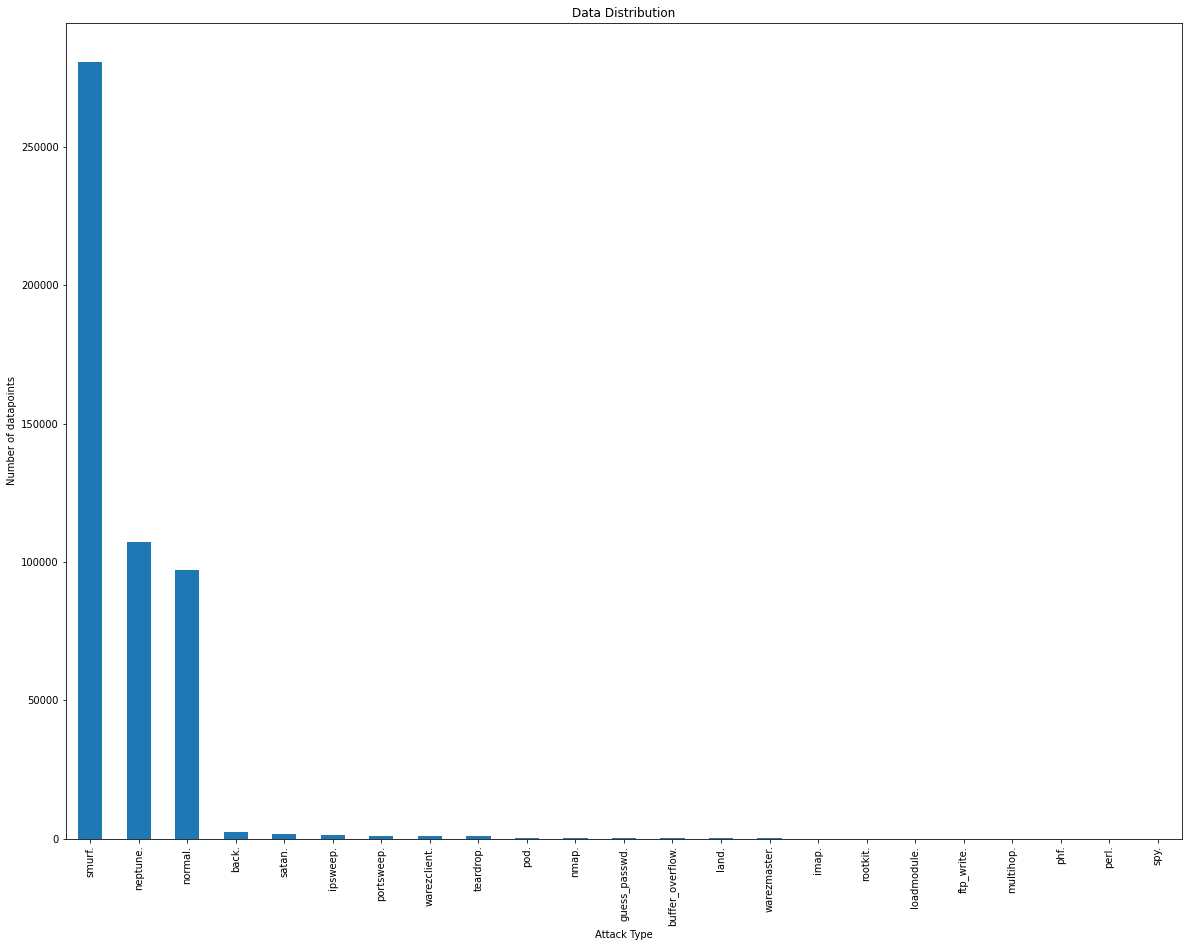

In [7]:
plt.figure(figsize=(20,15))
attack_type_distribution = kdd['attack_type'].value_counts()
attack_type_distribution.plot(kind='bar')
plt.xlabel('Attack Type')
plt.ylabel('Number of datapoints')
plt.title('Data Distribution')

In [8]:
kdd['attack_type'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: attack_type, dtype: int64

In [9]:
missing_values_count = (kdd.isnull().sum()) # Check for missing values
print("Number of missing values within each column:")
print(missing_values_count)

Number of missing values within each column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  

In [10]:
kdd_copy = kdd.copy()
n = kdd.nunique(axis=0)
print('Count of all unique values of each column:')
print(n)
for index, value in n.items():
    if value == 1:
        kdd_copy = kdd.drop(index, axis=1)

Count of all unique values of each column:
duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                 

In [11]:
print('\nCount of all unique values of each column after removing redundant features:')
print(kdd_copy.nunique(axis=0))


Count of all unique values of each column after removing redundant features:
duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   

In [12]:
# Drop duplicate values
kdd_copy.drop_duplicates(keep='first', inplace = True)

# Encoding Categorical Features

In [13]:
# Get column names of values that are of 'Object' datatype
print(list(kdd_copy.select_dtypes(['object']).columns))

['protocol_type', 'service', 'flag', 'attack_type']


In [14]:
#kdd_encoded = pd.get_dummies(kdd_copy, columns=['protocol_type', 'service', 'flag', 'attack_type'])
#kdd_copy.head()

In [15]:
# Assigning categorical number to categories
#attack_type_names = []

In [16]:
multi_class_data_preprocessed = pd.get_dummies(kdd_copy, columns=['protocol_type','service','flag'])

multi_class_data_preprocessed.to_csv('multi_class_data_preprocessed.csv')
multi_class_data_preprocessed

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        181       5450     0               0       0    0   
1              0        239        486     0               0       0    0   
2              0        235       1337     0               0       0    0   
3              0        219       1337     0               0       0    0   
4              0        217       2032     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
494016         0        310       1881     0               0       0    0   
494017         0        282       2286     0               0       0    0   
494018         0        203       1200     0               0       0    0   
494019         0        291       1200     0               0       0    0   
494020         0        219       1234     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0                       0          1                0  ...         0   
1                       0          1                0  ...         0   
2                       0          1                0  ...         0   
3                       0          1                0  ...         0   
4                       0          1                0  ...         0   
...                   ...        ...              ...  ...       ...   
494016                  0          1                0  ...         0   
494017                  0          1                0  ...         0   
494018                  0          1                0  ...         0   
494019                  0          1                0  ...         0   
494020                  0          1                0  ...         0   

        flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  \
0               0            0          0        0        0        0        0   
1               0            0          0        0        0        0        0   
2               0            0          0        0        0        0        0   
3               0            0          0        0        0        0        0   
4               0            0          0        0        0        0        0   
...           ...          ...        ...      ...      ...      ...      ...   
494016          0            0          0        0        0        0        0   
494017          0            0          0        0        0        0        0   
494018          0            0          0        0        0        0        0   
494019          0            0          0        0        0        0        0   
494020          0            0          0        0        0        0        0   

        flag_SF  flag_SH  
0             1        0  
1             1        0  
2             1        0  
3             1        0  
4             1        0  
...         ...      ...  
494016        1        0  
494017        1        0  
494018        1        0  
494019        1        0  
494020        1        0  

[145586 rows x 118 columns]

In [17]:
multi_class_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Columns: 118 entries, duration to flag_SH
dtypes: float64(15), int64(22), object(1), uint8(80)
memory usage: 54.4+ MB


# Data Visuals

In [19]:
# Split data into features(x = used to predict labels) and labels (y = data we want to predict)
x = multi_class_data_preprocessed.drop('attack_type', axis = 1)
y = multi_class_data_preprocessed['attack_type']

In [20]:
# Separate train and test sets from dataset 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
29208          0        206       1324     0               0       0    0   
493576         0        263       2634     0               0       0    0   
53416          5        812        334     0               0       0    0   
19001          0        289       2658     0               0       0    0   
359043         0          0          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
29208                   0          1                0  ...         0   
493576                  0          1                0  ...         0   
53416                   0          1                0  ...         0   
19001                   0          1                0  ...         0   
359043                  0          0                0  ...         0   

        flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  \
29208           0            0          0        0        0        0        0   
493576          0            0          0        0        0        0        0   
53416           0            0          0        0        0        0        0   
19001           0            0          0        0        0        0        0   
359043          0            0          0        1        0        0        0   

        flag_SF  flag_SH  
29208         1        0  
493576        1        0  
53416         1        0  
19001         1        0  
359043        0        0  

[5 rows x 117 columns]

In [21]:
x_train.shape, x_test.shape

((116468, 117), (29118, 117))

In [22]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

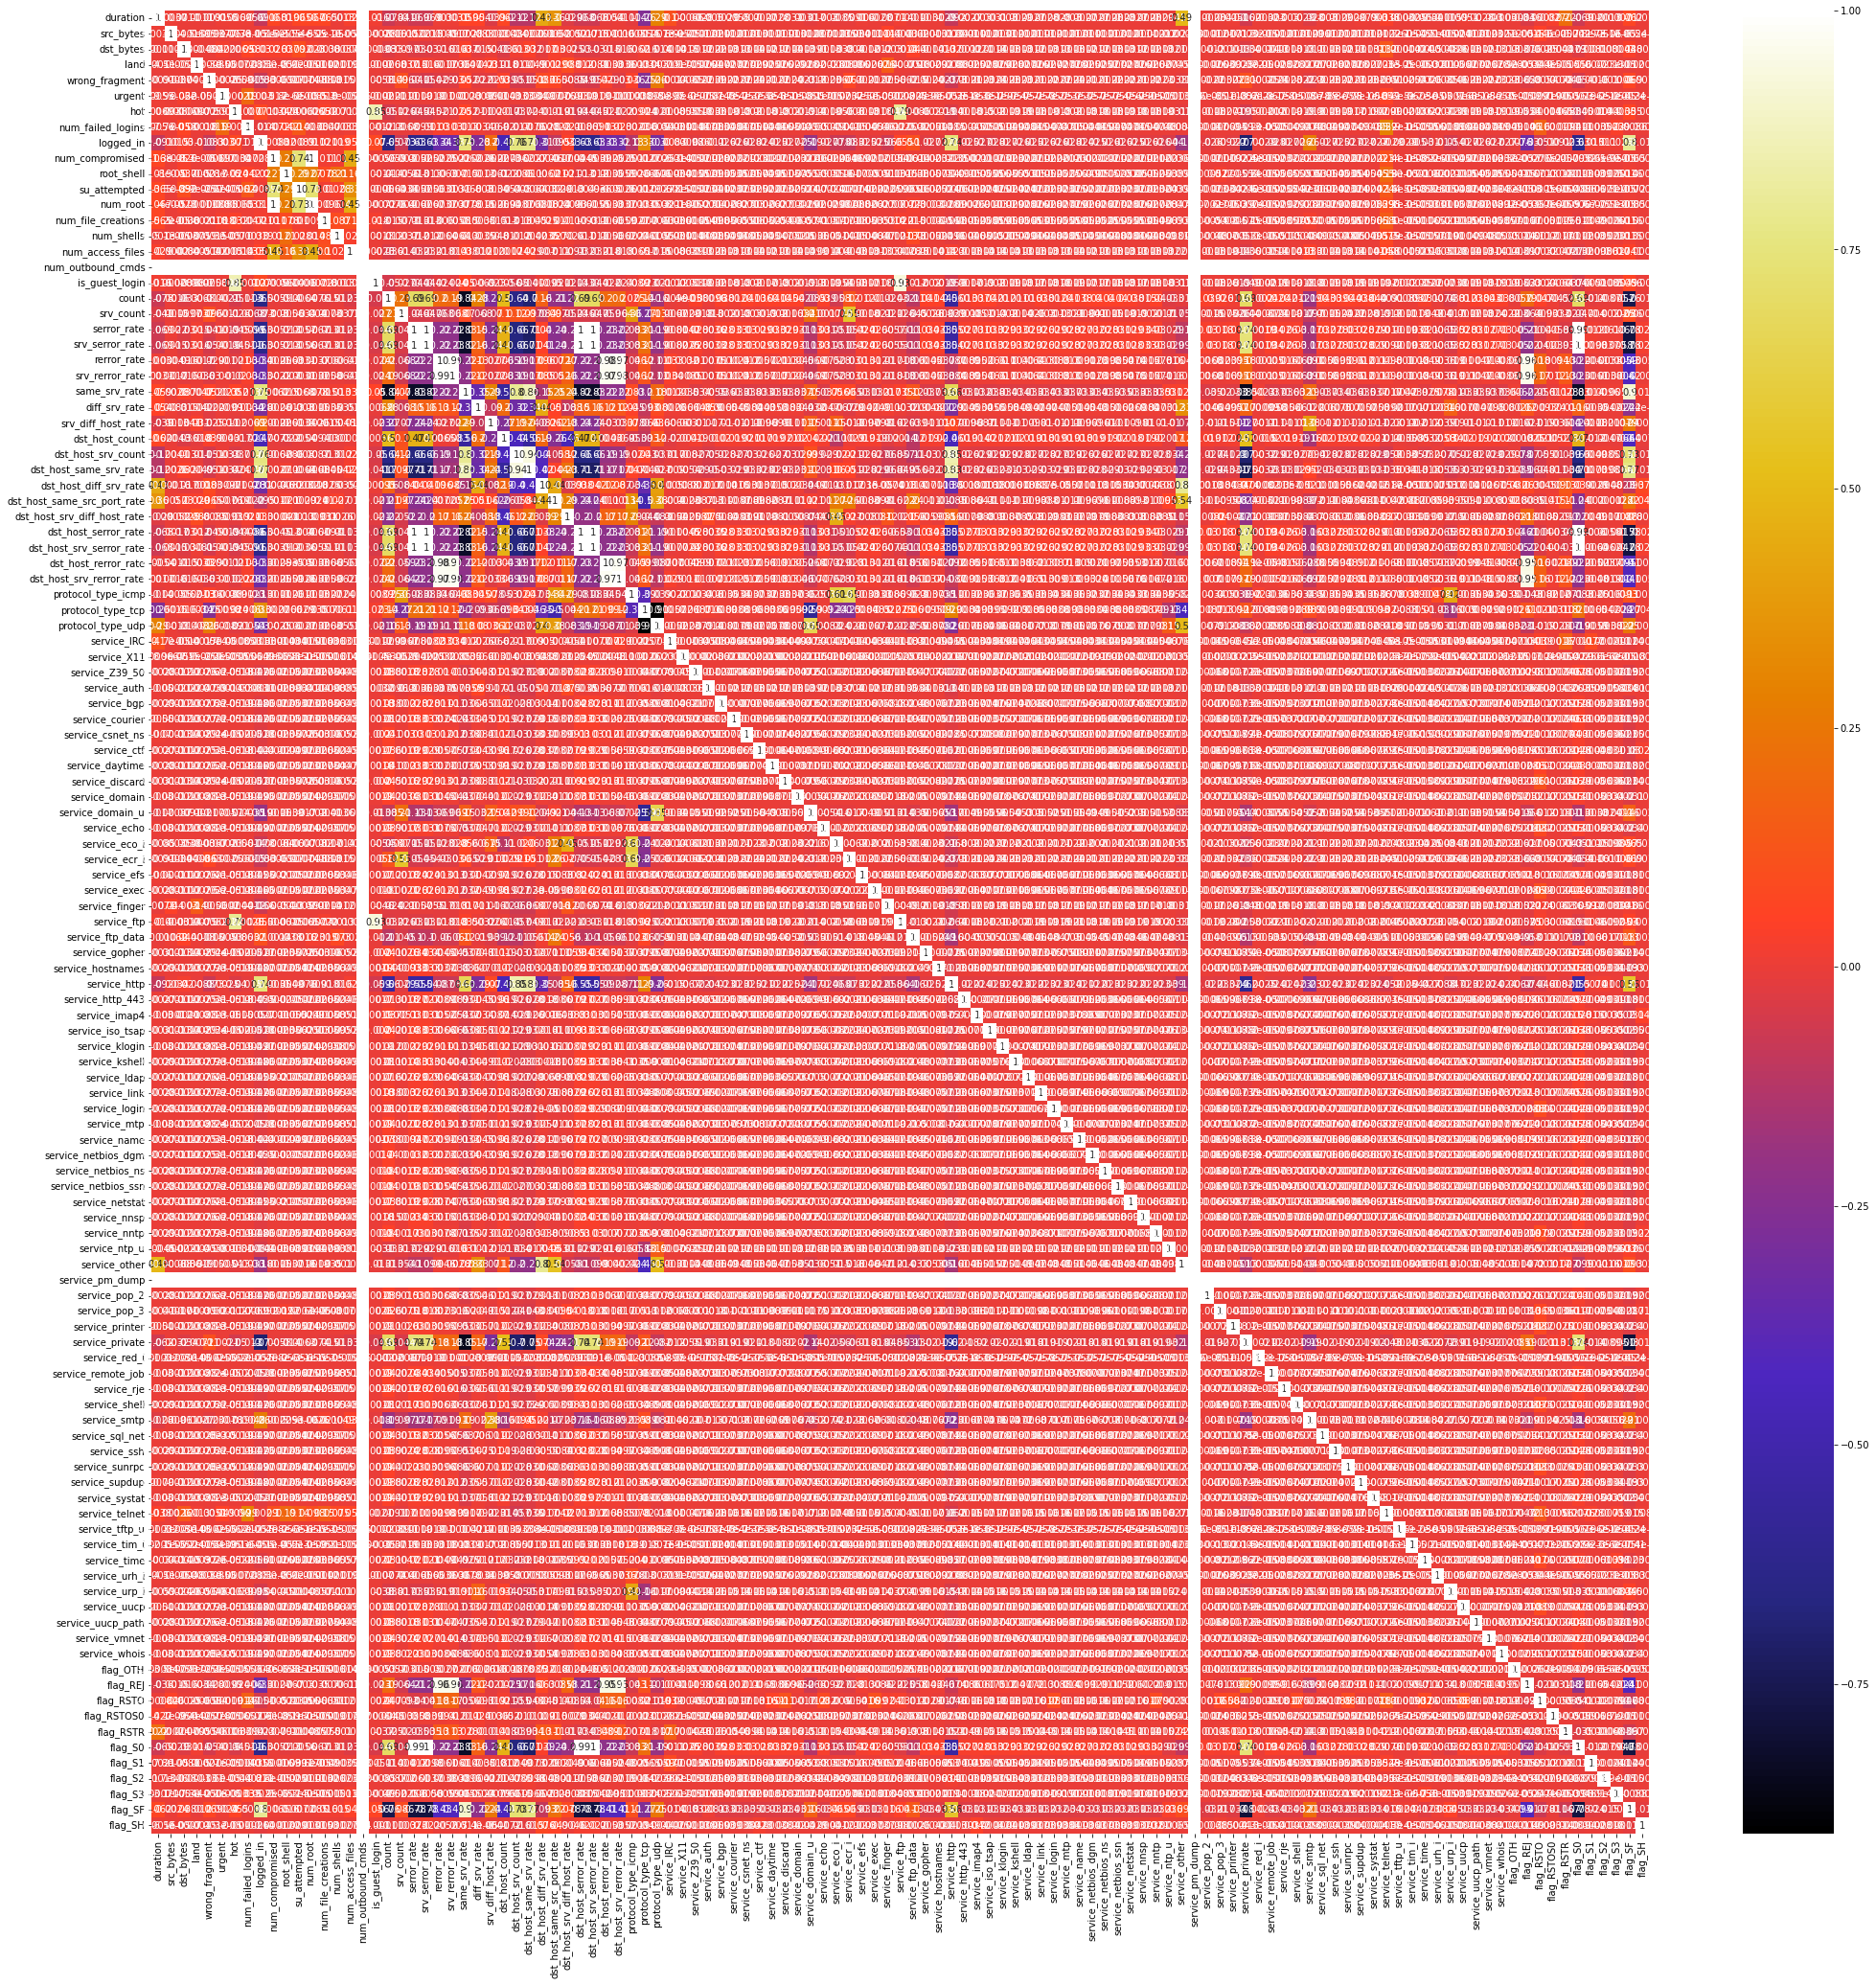

                duration  src_bytes  dst_bytes      land  wrong_fragment  \
duration        1.000000   0.003658   0.001092 -0.001096       -0.009092   
src_bytes       0.003658   1.000000  -0.000181 -0.000045       -0.000371   
dst_bytes       0.001092  -0.000181   1.000000 -0.000485       -0.004019   
land           -0.001096  -0.000045  -0.000485  1.000000       -0.000855   
wrong_fragment -0.009092  -0.000371  -0.004019 -0.000855        1.000000   
...                  ...        ...        ...       ...             ...   
flag_S1        -0.002099   0.000078   0.008101 -0.000197       -0.001637   
flag_S2        -0.001324   0.000002   0.007952 -0.000126       -0.001047   
flag_S3        -0.000714  -0.000031   0.000439 -0.000073       -0.000604   
flag_SF         0.062088  -0.002391   0.038072 -0.012444        0.068684   
flag_SH        -0.001582  -0.000065  -0.000699 -0.000149       -0.001234   

                  urgent       hot  num_failed_logins  logged_in  \
duration        0.0

In [23]:
# Pearson Correlation
plt.figure(figsize=(35,35))
x_train_corr = x_train.corr()
sns.heatmap(x_train_corr,annot=True, cmap= plt.cm.CMRmap)
plt.show()
print(x_train_corr)

In [27]:
correlated_features = set()
for i in range(len(x_train_corr.columns)):
    for j in range(i):
        if abs(x_train_corr.iloc[i,j]) > 0.9:
            col_name = x_train_corr.columns[i]
            correlated_features.add(col_name)
len(set(correlated_features))

13

In [28]:
correlated_features

{'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'flag_REJ',
 'flag_S0',
 'flag_SF',
 'num_root',
 'protocol_type_udp',
 'service_ftp',
 'srv_rerror_rate',
 'srv_serror_rate'}

In [29]:
x_train.drop(correlated_features, axis=1)
x_test.drop(correlated_features, axis=1)

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
353752         0          0          0     0               0       0    0   
33623          0        325        406     0               0       0    0   
139040         0        258        285     0               0       0    0   
17647          0        253        453     0               0       0    0   
6859           0       1060        278     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
86565          0         28          0     0               3       0    0   
77160         10          0    5150180     0               0       0    0   
232            0        296       1415     0               0       0    0   
32918          0        341        455     0               0       0    0   
22976          0        301       4407     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  service_vmnet  \
353752                  0          0                0  ...              0   
33623                   0          1                0  ...              0   
139040                  0          1                0  ...              0   
17647                   0          1                0  ...              0   
6859                    0          1                0  ...              0   
...                   ...        ...              ...  ...            ...   
86565                   0          0                0  ...              0   
77160                   0          0                0  ...              0   
232                     0          1                0  ...              0   
32918                   0          1                0  ...              0   
22976                   0          1                0  ...              0   

        service_whois  flag_OTH  flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S1  \
353752              0         0          0            0          0        0   
33623               0         0          0            0          0        0   
139040              0         0          0            0          0        0   
17647               0         0          0            0          0        0   
6859                0         0          0            0          0        0   
...               ...       ...        ...          ...        ...      ...   
86565               0         0          0            0          0        0   
77160               0         0          0            0          0        0   
232                 0         0          0            0          0        0   
32918               0         0          0            0          0        0   
22976               0         0          0            0          0        0   

        flag_S2  flag_S3  flag_SH  
353752        0        0        0  
33623         0        0        0  
139040        0        0        0  
17647         0        0        0  
6859          0        0        0  
...         ...      ...      ...  
86565         0        0        0  
77160         0        0        0  
232           0        0        0  
32918         0        0        0  
22976         0        0        0  

[29118 rows x 104 columns]

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [10]*5))
dnns_classifier.fit(np.array(x_train), y_train)
dnns_predictions_labels = dnns_classifier.predict(x_train)

In [ ]:
print(dnns_prediction_labels)